# Clojure Overture - Main Tutorial

This tutorial is intended as a tour through the fundamentals of
Clojure and the features that distinguish it from other languages.

Thanks to [ClojureBridge](http://clojurebridge.github.io/curriculum),
[Clojure for the Brave and
True](https://www.braveclojure.com/clojure-for-the-brave-and-true/),
and [ClojureDocs](https://clojuredocs.org) for inspiring the content.

This tutorial broken into the following sections:

1. [Language Basics](#Language-Basics)
2. [Functional Programming](#Functional-Programming)
3. [Data Processing](#Data-Processing)
4. [Concurrency](#Concurrency)
5. [Lisp](#Lisp)
6. [JVM Hosted](#JVM-Hosted)
7. [Polymorphism](#Polymorphism)
8. [Building a Project](#Building-a-Project)
9. [Web Development](#Web-Development)

## Language Basics

In [1]:
(println "Hello World")

Hello World


### Maths

In [2]:
;; Basic Maths (prefix notation)
(println (+ 3 4))
(println (- 3.14 1.1))
(println (* 3 4))
(println (/ 3 4)) ;; Rational
(println (/ 3 4.0)) ;; Float

7
2.04
12
3/4
0.75


In [3]:
;; Prefix notation removes precedence ambiguity
(+ (* 1 2) (* 3 4)) ;; vs. (1 * 2 + 3 * 4)

14

In [4]:
;; Prefix notation is more concise
(+ 1 2 3 4 5) ;; vs. 1 + 2 + 3 + 4 + 5

15

### Vars

In [5]:
;; Define a var (spoiler: vars don't vary)
(def age 42)

#'user/age

In [6]:
;; A symbol (the names of vars and functions) ending in ? indicates a boolean
(def kiwi? true)

#'user/kiwi?

In [7]:
;; Let defines vars in a lexical scope (and returns the value of the last form)
(let [first-name "Fred"
      last-name "Dagg"]
  (str first-name " " last-name))

"Fred Dagg"

### Collections

#### Vectors

In [8]:
;; Vectors are array-backed sequences; most similar to a Python list
[1 2 3 4 5]

[1 2 3 4 5]

In [9]:
;; Basic sequence operations on a vector
(def my-vector [1 2 3 4 5])
(println (count my-vector))
(println (first my-vector))
(println (rest my-vector)) ;; Returns a sequence
(println (nth my-vector 1))

5
1
(2 3 4 5)
2


In [10]:
;; Append to a vector with conj (returns a new vector)
(conj [1 2 3 4 5] 42)

[1 2 3 4 5 42]

In [11]:
;; Remove last item in a vector
(pop [1 2 3 4 5])

[1 2 3 4]

In [12]:
;; Concatenate Vectors
(concat [1 2] [3 4])

(1 2 3 4)

#### Maps

In [13]:
;; Same idea as a Python dictionary
{:first-name "Fred"
 :last-name "Dagg"}
;; Commas aren't needed, and are treated as whitespace in Clojure

{:first-name "Fred", :last-name "Dagg"}

In [14]:
;; Associate a key
(println (assoc {:first-name "Fred"} :last-name "Dagg"))
;; Disassociate a key
(println (dissoc {:first-name "Fred"} :first-name))

{:first-name Fred, :last-name Dagg}
{}


In [15]:
;; Keywords can act as functions to access values
(:first-name {:first-name "Fred" :last-name "Dagg"})

"Fred"

In [16]:
;; Any value can be a key, but you need to use get to access values
(get {"first-name" "Fred"} "first-name")

"Fred"

In [17]:
(def my-map {:first-name "Fred" :last-name "Dagg"})
;; Get a sequence of keys or values
(println (keys my-map))
(println (vals my-map))
;; Converting to a vector (or using as a sequence) gives key/value pairs
(println (vec my-map))

(:first-name :last-name)
(Fred Dagg)
[[:first-name Fred] [:last-name Dagg]]


#### Other Collections

In [18]:
;; Lists (linked-list sequence, supports the same operations as a vector)
(def my-list '(1 2 3 4 5))
;; Conj/pop work at the front of a list (most efficient operation)
(println (conj my-list 42))
(println (pop my-list))

(42 1 2 3 4 5)
(2 3 4 5)


In [19]:
;; Sets
(def my-set #{1 2 3 4 5})
(contains? my-set 5)

true

### Flow Control

In [20]:
;; If/else statement (Note that if returns the value of the executed form))
(if true
  "True!"
  "False!")

"True!"

In [21]:
;; Conditionals
(println (= 1 1))
(println (< 1 2))
(println (> 2 1))
(println (<= 1 2))
(println (>= 2 1))
(println (and (< 1 2 3) (> 3 2 1)))
(println (or true false))
;; false and nil are the only "falsey" values
(println (not (or false nil)))

true
true
true
true
true
true
true
true


In [22]:
;; Use do to run multiple statements in a single "form" (usually only needed for side-effects)
;; do also returns the last value in the form
(if true
  (do
    (println "True!")
    "truthy-return-value")
  (do
    (println "False!")
    "falsey-return-value"))

True!


"truthy-return-value"

In [23]:
;; Or use when (if statement with no "else")
(when true
  "Truthy thing 1"
  "Truthy thing 2")

"Truthy thing 2"

In [24]:
;; cond is an alternative to if/elseif/else
(def n 42)
(cond (< n 0) "Negative"
      (> n 0) "Positive"
      :else "Zero")

"Positive"

### Functions

In [25]:
;; Define a function
(defn greeting
  "Docstring goes here..."
  [first-name last-name]
  (str "Hello " first-name " " last-name))

#'user/greeting

In [26]:
;; The value of the last form is the return value
(greeting "Fred" "Dagg")

"Hello Fred Dagg"

In [27]:
;; Anonymous functions
(let [add (fn [x y] (+ x y))
      square #(* % %)
      sub #(- %1 %2)]
  [(add 1 3)
   (square 4)
   (sub 3 1)])

[4 16 2]

In [28]:
;; A function can support multiple signatures
(defn greeting
  "Docstring goes here..."
  ([first-name last-name]
    (greeting (str first-name " " last-name)))
  ([full-name]
    (str "Hello " full-name)))

(greeting "Fred" "Dagg")

"Hello Fred Dagg"

In [29]:
(require '[clojure.string :as string])

;; A function can be "variadic"
(defn greeting
  "Docstring goes here..."
  [& name-parts]
  (str "Hello " (string/join " " name-parts)))

(greeting "Fred" "Dagg" "III")

"Hello Fred Dagg III"

In [30]:
;; Functions can support keyword arguments
(defn greeting
  [full-name & {:keys [salutation]
                :or {salutation "Hello"}}]
  (str salutation " " full-name))

(greeting "Fred Dagg" :salutation "Gidday")

"Gidday Fred Dagg"

## Functional Programming

In [31]:
;; Immutable data structures require different ways of thinking
(defn double-values
  [values]
  (if (empty? values)
    '()
    (conj (double-values (rest values))
          (* 2 (first values)))))

(double-values [1 2 3 4 5])

(2 4 6 8 10)

In [32]:
;; Watch out for stack overflow...
(try
  (double-values (range 99999))
  (catch StackOverflowError ex "Woops..."))

"Woops..."

In [33]:
;; Use tail-recursion to avoid stack-overflow
(defn double-values-recursive
  ([values]
   (double-values-recursive values []))
  ([values new-values]
   (if (empty? values)
     new-values
     (recur (rest values) (conj new-values (* 2 (first values)))))))

(take 5 (double-values-recursive (range 99999)))

(0 2 4 6 8)

In [34]:
;; Tail-recursion with loop
(defn double-values-loop
  [values]
  (loop [values values
         new-values []]
    (if (empty? values)
      new-values
      (recur (rest values)
        (conj new-values (* 2 (first values)))))))

(take 5 (double-values-loop (range 99999)))

(0 2 4 6 8)

In [35]:
;; Higher-order functions are great for abstracting ideas
(defn alter-values
  [func values]
  (loop [values values
         new-values []]
    (if (empty? values)
      new-values
      (recur (rest values)
        (conj new-values (func (first values)))))))

(println (alter-values #(* 2 %) [1 2 3 4 5]))
(println (alter-values (partial * 2) [1 2 3 4 5]))

[2 4 6 8 10]
[2 4 6 8 10]


### Pure functions FTW!

Pure function: Takes an input; returns a value; has no other
"side-effects" (e.g. I/O, changing state).

I.E. Keep I/O operations in the highest functions. We'll see examples
later of where it is important for functions to be "pure".

## Data Processing

### Map/Filter/Reduce

In [36]:
(map #(* 2 %) [1 2 3 4 5])

(2 4 6 8 10)

In [37]:
(filter even? [1 2 3 4 5])

(2 4)

In [38]:
(reduce + [1 2 3 4 5])

15

In [39]:
;; Reduce can also take a starting value
(reduce #(str %1 " " %2) "The numbers are:" [1 2 3 4 5])

"The numbers are: 1 2 3 4 5"

In [40]:
;; Composing map/filter/reduce
(reduce + (map #(* 2 %) (filter even? (range 100))))

4900

In [41]:
;; Threading improves readability
(->> (range 100)
     (filter even?)
     (map #(* 2 %))
     (reduce +))

4900

In [42]:
(require '[clojure.string :as string])

;; Threading (-> ->> as->) is useful for all sorts of data transformations
(-> {:first-name "Fred" :last-name "Dagg"}
    :first-name
    (str " is the first name")
    string/upper-case)

"FRED IS THE FIRST NAME"

In [43]:
;; Destructuring is also useful for processing data structures
(->> {:first-name "Fred" :last-name "Dagg"}
     (map (fn [[key value]]
       (str key " has value " value))))

(":first-name has value Fred" ":last-name has value Dagg")

In [44]:
(require '[clojure.string :as string])

;; Destructuring a variable number of sequence items
(let [name "Fred Dagg Farming DIY"
      parts (string/split name #" ")
      [first-name last-name & interests] parts]
  (println first-name)
  (println last-name)
  (println interests))

Fred
Dagg
(Farming DIY)


In [45]:
;; A data-processing example

(require '[clojure.string :as string])

(defn text-stats
 [text]
 (let [words (string/split text #" ")]
   {:character-count (count text)
    :word-count (count words)
    :max-word-length (->> words
                          (map count)
                          (apply max))}))

(as-> (slurp "../LICENSE") $
  (string/split $ #"\n")
  (map text-stats $)
  (filter #(> (:character-count %) 50) $)
  (map :word-count $)
  (reduce + $))

5824

## Concurrency

In [46]:
(defn slow-func
  [arg]
  (Thread/sleep 100)
  arg)

(->> (range 10)
     (map slow-func)
     (doall)
     (time))

(->> (range 10)
     (pmap slow-func)
     (doall)
     (time))

"Elapsed time: 1001.117065 msecs"
"Elapsed time: 121.726562 msecs"


(0 1 2 3 4 5 6 7 8 9)

Clojure doesn't support mutable variables, but sometimes you need to
maintain a concept of changing system state, particularly when you
need to share state between multiple threads.

Clojure provides **reference types** that are mutable references to
immutable values (i.e. you never mutate a list, you just update the
reference to point to an updated copy of the list, but Clojure's
persistent data-structures makes this much more resource efficient
                  than it sounds).

An atom is a reference type that stores a value, and allows functions
to be applied to change the value. If two threads simultaneously
change the same atom, this will be detected, and one of the functions
will be re-applied on the value that was the result of the other
function. Because a function that changes the value may be applied
more than once, it MUST be pure. You can also call a watcher function
whenever an atom is updated.

In [47]:
(def my-counter (atom 0))
(println (str "Initial counter value: " @my-counter))

(add-watch my-counter :my-watcher
  (fn [key atom old-state new-state]
    (println (str "New counter value: " new-state))))

(swap! my-counter inc)
(swap! my-counter inc)

Initial counter value: 0
New counter value: 1
New counter value: 2


2

In [48]:
;; Using an atom as a memoizing "cache" (example from: https://clojure.org/reference/atoms)
(defn my-memoize [f]
  (let [mem (atom {})]
    (fn [& args]
      (if-let [e (find @mem args)]
        (val e)
        (let [ret (apply f args)]
          (swap! mem assoc args ret)
          ret)))))

(defn fib [n]
  (if (<= n 1)
    n
    (+ (fib (dec n)) (fib (- n 2)))))

(time (fib 35))

(def fib (my-memoize fib))

(time (fib 35))

"Elapsed time: 387.667734 msecs"
"Elapsed time: 0.855625 msecs"


9227465

Also see **refs** for coordinating simultaneous updates to multiple
references in synchronised transactions (using STM).

## Lisp

You may have noticed that the code we have been writing is made up of
the same data-structures as are supported. This is the property of
homoiconicity (code is data) that Clojure shares with the rest of the
Lisp family of languages.

To take advantage of this, Lisp's allow the definition of **macros**,
which can be thought of as functions that take the raw forms they are
passed as input instead of the values they evaluate to.

Macros allow the core of the language to be very small, as most
functionality can be achieved through macros.

Macros mean that library developers have almost as much power as the
language developers themselves. A great example of this is the
[core.async](https://github.com/clojure/core.async) library, which
provides co-routine syntax very similar to that of Go, or the
[Korma](http://sqlkorma.com/) library for building SQL queries in a
way that allows them to be manipulated like other data-structures.

It is worth noting however that macros do add complexity to the code,
and should really only be used as a last resort for achieving better
syntax. In general, a macro will be written in a light-weight fashion
that makes use of other functions to transform forms.

In [49]:
;; See how when is a macro that translates into an if statement.
(macroexpand '(when true (println "True!")))

(if true (do (println "True!")))

In [50]:
(defmacro infix
  [original-form]
  (let [[arg1 op arg2] original-form]
    (list op arg1 arg2)))

#'user/infix

In [51]:
(infix (1 + 1))

2

In [52]:
(macroexpand '(infix (1 + 1)))

(+ 1 1)

Fun facts: There is a long history of Lisp languages, the most famous
of which are probably Common Lisp, Scheme, and Elisp
(emacs-lisp). Lisp is actually a really easy language to implement:
[http://norvig.com/lispy.html](http://norvig.com/lispy.html). The
roots of Lisp go all the way back to Alonzo Church's [Lambda
Calculus](https://en.wikipedia.org/wiki/Lambda_calculus), which is
computationally equivalent to the concept of Turing Machines, and was
developed indepdently as the same year. If you're interested in Lisp,
have a look at the classic "wizard book" [Structure and Interpretation
of Computer
Programs](https://mitpress.mit.edu/sites/default/files/sicp/index.html).

## JVM Hosted

Clojure has a small core (philosophically different to
"batteries-included"), and makes use of the platform it is hosted on,
either the JVM (Clojure), JavaScript (ClojureScript) or Window's CLR
(ClojureCLR).

In [53]:
(let [now (java.util.Date.)]
  (.toString now))

"Sat Apr 21 07:53:54 UTC 2018"

You can even implement Java interfaces in Clojure and provide classes
for Java files to use.

Most Clojure libraries are just Clojure-style wrappers around existing
Java libraries. Even Clojure package management is just based on
Java's Maven. For example, Incanter provides a wrapper around
JFreeChart (as well as data-science helpers).

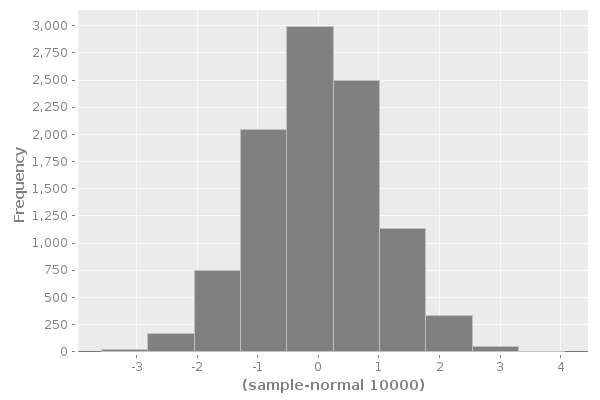

In [54]:
(require '[clojupyter.misc.helper :as helper])
(helper/add-dependencies '[incanter "1.5.7"])

(use '(incanter stats charts))
(-> (sample-normal 10000)
    histogram
    (.createBufferedImage 600 400))


If you're interested in the concept of a language like Clojure but
hosted on Python instead (so that you can use all of Python's great
libraries), see: [Hy](http://hylang.org/).

## Building a Project

To see how easy it is to build/package a project, try the following commands in your terminal:

```bash
# To open a shell in the Docker container
make bash

# To enter the project-space
cd projects

# To start a new project
lein new app my-app

# Move into the project directory
cd my-app

# Run the app
lein run

# Package the app
lein uberjar

# Run the packaged app (on any machine where java was installed, regardless of what package dependencies you have)
java -jar target/uberjar/my-app-0.1.0-SNAPSHOT-standalone.jar
```

## Web Development

The most out-of-the-box Clojure web dev library is [Luminus](http://www.luminusweb.net/).

Luminus (like many Clojure web-dev libraries) is based on [Ring](https://github.com/ring-clojure/ring). Ring takes a functional view of web-applications: an app is just a function for converting a **request** (represented as a map) into a **response** (also represented as a map). In this model, testing is easy (just call your application function with a fake response map), applications are server-agnostic (as long as the server can produce request maps and serve response maps), and middleware can be implemented as higher-order functions that operate on your application:

```clojure
(def app
  (-> my-request-handler
      middleware-a
      middleware-b)
```

[Hiccup](https://github.com/weavejester/hiccup) is also a popular Clojure(Script) library for generating HTML from Clojure data-structures, which makes it easy to use all of the existing tools for processing Clojure data-structures generating/manipulating the DOM structure.

Also of interest is the fact that modern JS libraries (particularly React) view an application view as the function of the current application state: `view = f(state)`. This aligns well with a functional programming approach, which has led to the development of ClojureScript libraries based on React. Most notably [Om](https://github.com/omcljs/om) and [Reagent](https://github.com/reagent-project/reagent).

The reagent-demo project provided in this Notebook's repository also provides a demonstration of how live-reloading streamlines JavaScript development. Start it by:

```bash
# Open a shell in the Docker container
make bash

# Enter the project directory
cd projects/reagent-demo

# Run the Ring web-app (see files in src/clj/reagent_demo)
lein run

# Run the live-reloading server (do this in a separate terminal)
lein figwheel
```

Then, open the app at [http://localhost:3000](http://localhost:3000), make a change in `src/cljs/reagent_demo/core.cljs`, and see it take immediate effect (though state atoms defined with `defonce` are not affected).

For a really awesome example of live-reloading, see: https://www.youtube.com/watch?v=KZjFVdU8VLI